<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics

In [11]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,-0.449590,-0.090294,-1.339090
1,0.231038,0.039148,-0.325187
2,-1.087199,-0.433799,1.466255
3,-0.158938,0.030792,1.030700
4,-0.350858,-0.488113,-0.124978
...,...,...,...
49995,-1.677711,-1.246355,-0.714757
49996,0.555491,0.464993,-0.682418
49997,0.471119,0.399116,-1.698961
49998,-0.768154,-0.227787,-0.534473


In [13]:
n=50
rep=1
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    table_data['e_hat']=table_data['Y']-table_data['Y_hat']
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3  ...          Y      Y_hat         e_hat
rep  index                                ...                                    
1.0  0.0    0.975314 -0.346998 -1.433343  ...  -1.304033  -1.290405 -1.362772e-02
     1.0   -0.379315 -0.044329 -0.203213  ...   3.050211   3.050211 -2.612738e-07
     2.0    0.444090 -0.111014 -0.224146  ...   3.204069   3.204190 -1.207820e-04
     3.0    1.176392 -0.509627  0.904954  ...   7.010762   6.963950  4.681161e-02
     4.0   -0.862601 -2.407275 -1.834339  ... -48.260377  -6.559573 -4.170080e+01
...              ...       ...       ...  ...        ...        ...           ...
99.0 45.0   1.332207  2.401800  0.591092  ... -77.936511  10.263513 -8.820002e+01
     46.0  -0.300202 -1.078869 -0.475786  ...   1.269586   0.548785  7.208016e-01
     47.0   0.061044  0.649136 -0.012283  ...   5.330652   4.953902  3.767501e-01
     48.0   0.263409  0.341764  0.985787  ...   8.176131   8.166843  9.287450e-03
     49.0   1.849942 -0.618698  2.569661  ...  13.151705  13.062710  8.899470e-02

[4950 rows x 7 columns]

In [14]:
table_data_all.mean()

Xt1      0.007895
Xt2      0.021899
Xt3      0.005098
e       -0.207855
Y        3.846505
Y_hat    4.054360
e_hat   -0.207855
dtype: float64

In [15]:
table_data_all.var()

Xt1        1.023810
Xt2        0.994958
Xt3        0.973347
e         86.949424
Y        103.604400
Y_hat     15.041188
e_hat     86.949424
dtype: float64

In [16]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_all.corr()

,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
Xt1,1.000000,0.003123,0.020640,0.017743,0.063679,0.124465,0.017743
Xt2,0.003123,1.000000,-0.003667,0.033641,0.176659,0.382759,0.033641
Xt3,0.020640,-0.003667,1.000000,0.008170,0.356704,0.916528,0.008170
e,0.017743,0.033641,0.008170,1.000000,0.924604,0.022312,1.000000
Y,0.063679,0.176659,0.356704,0.924604,1.000000,0.401464,0.924604
Y_hat,0.124465,0.382759,0.916528,0.022312,0.401464,1.000000,0.022312
e_hat,0.017743,0.033641,0.008170,1.000000,0.924604,0.022312,1.000000


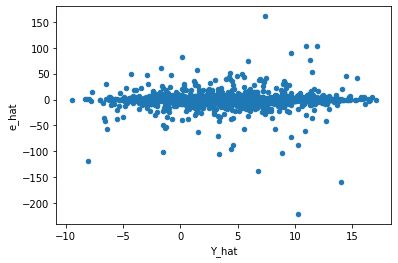

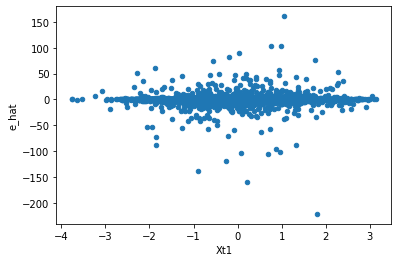

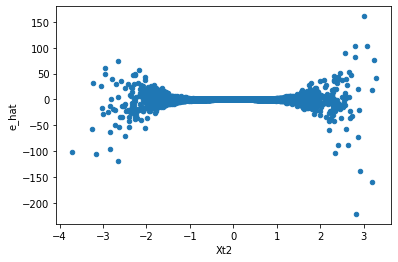

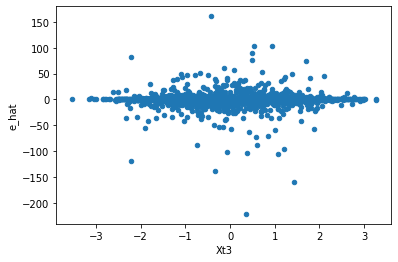

In [17]:
table_data_all.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt3', y='e_hat', kind = 'scatter')